importing libraries


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

loading data

In [3]:
data = pd.read_csv("data_for_lr.csv")

In [4]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [7]:
data.isnull().sum()

x    0
y    1
dtype: int64

In [8]:
#so in y we have one cell having missing value or NUll


<b>step 1 :- Data Processing</b>

In [10]:
data = data.dropna() #removes the rows that contains Null values
print("shape of the data: ", data.shape)

shape of the data:  (699, 2)


In [11]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


<b>1.1 :- splitting the data into train and test</b>

In [75]:
#training input and ouput data
train_input = np.array(data.x[0:500]).reshape(500,1)#reshaping into back 500 rows and 1 column
train_output = np.array(data.y[0:500]).reshape(500,1)

#validation or testing  input and output data
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output = np.array(data.y[500:700]).reshape(199,1)

In [76]:
# np.array(data.x[0:500]).reshape(500,1)
print(test_output.shape)
print(test_input.shape)

(199, 1)
(199, 1)


<b><font color = "green">Linear regression model</font></B>

<b>step 2:- forword prpogation </b>

f(x) = m*x + c

In [79]:
def forward_propogation(train_input , parameters):
    m = parameters["m"]
    c = parameters["c"] 

    predictions = np.multiply(m,train_input) + c

    return predictions 

<b>step 3 :- cost function </b>

summation(1/2n * (f(x) - y)^2)

In [83]:
def cost_function(predictions , train_output):
    cost = np.mean((predictions - train_output) ** 2) * 0.5
    return cost

<b>step 4 :- Grardient descent for backprpogation </b>

df = summation(f(x) - y)/n,
dm = df * x ,
dc = df,

In [84]:
def backward_propogations(train_input , train_output , predictions):

    derivatives = dict()

    df = predictions - train_output
    dm = np.mean(np.multiply(df,train_input))
    dc = np.mean(df)

    derivatives['dm'] = dm
    derivatives['dc'] = dc

    return derivatives

upadeting parameters (m and c )

In [85]:
def update_parameters(parameters , derivatives , learning_rate):
    parameters['m'] =  parameters['m'] - learning_rate *derivatives['dm']
    parameters['c'] =  parameters['c'] - learning_rate *derivatives['dc']

    return parameters

<b><font color = "Red">training model</font></B>

In [98]:
def train(train_input ,train_output , learning_rate , iters):

    #intializing random parameters

    parameters = dict()
    parameters["m"] = np.random.uniform(0,1) 
    parameters["c"] = np.random.uniform(0,1) 

    plt.figure()

    #list for storing loss cost
    loss = list()

    #iteration for training model

    for i in range(iters):

        #forword propogation
        predictions = forward_propogation(train_input , parameters)

        #cost
        cost = cost_function(predictions , train_output)
        
        loss.append(cost)
        print(f"Iteration = {i+1} , Loss = {cost}")

        #plot the function

        fig, ax = plt.subplots()
        
        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='training')


        legend = ax.legend()

        # plt.plot(train_input , train_output, "+")
        # plt.plot(train_input , predictions, "*")
        
        plt.show()
        
        

        
        #back prpogation
        derivatives = backward_propogations(train_input , train_output , predictions)

        #update parameters
        parameters = update_parameters(parameters , derivatives , learning_rate)

        

    return parameters,loss

Iteration = 1 , Loss = 528.5929915930191


<Figure size 640x480 with 0 Axes>

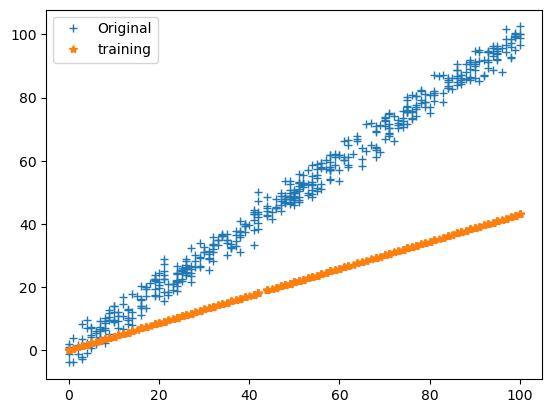

Iteration = 2 , Loss = 241.96557892165526


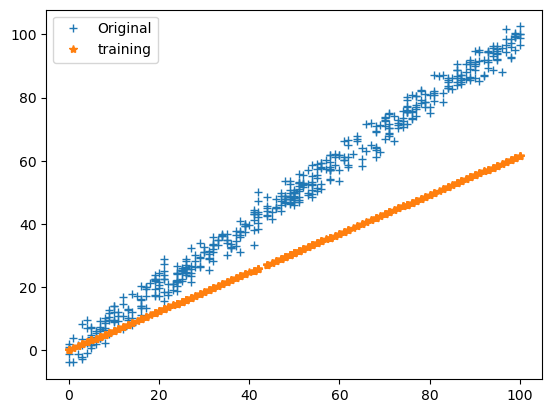

Iteration = 3 , Loss = 111.92240400365255


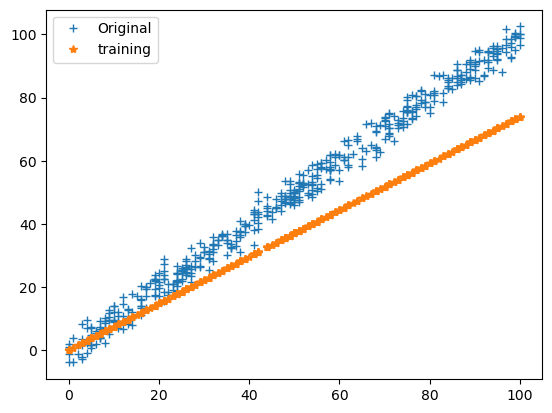

Iteration = 4 , Loss = 52.92167119352053


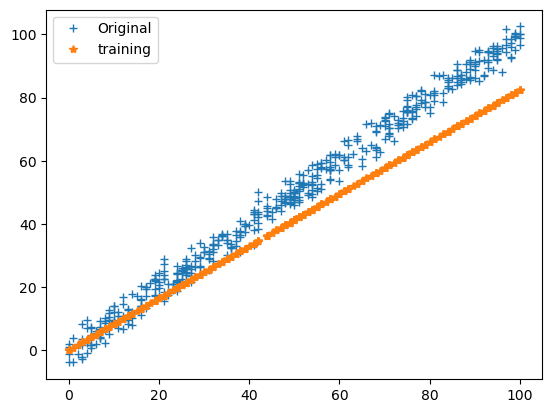

Iteration = 5 , Loss = 26.15297305728179


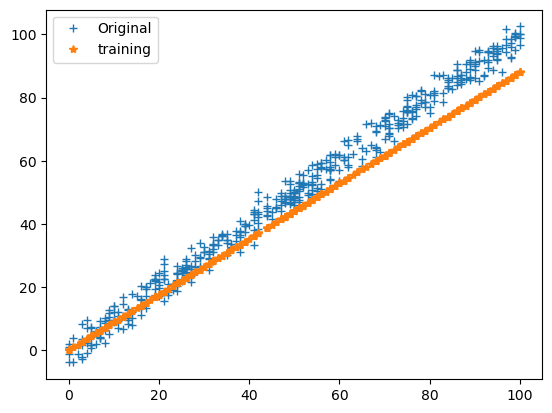

Iteration = 6 , Loss = 14.007984754134066


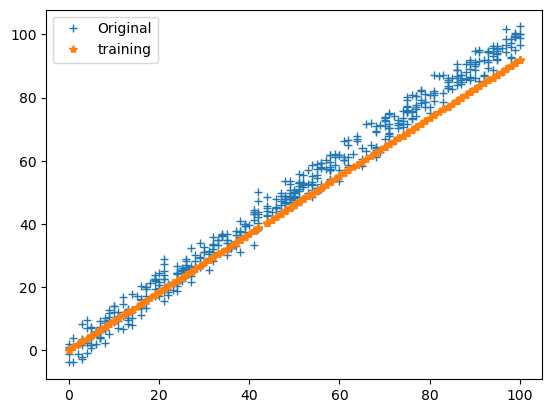

Iteration = 7 , Loss = 8.497789800098966


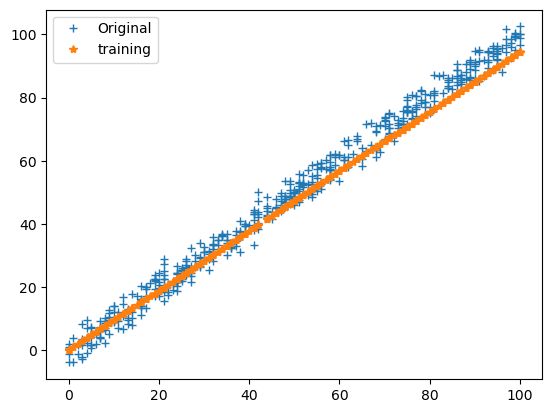

Iteration = 8 , Loss = 5.9978079375423565


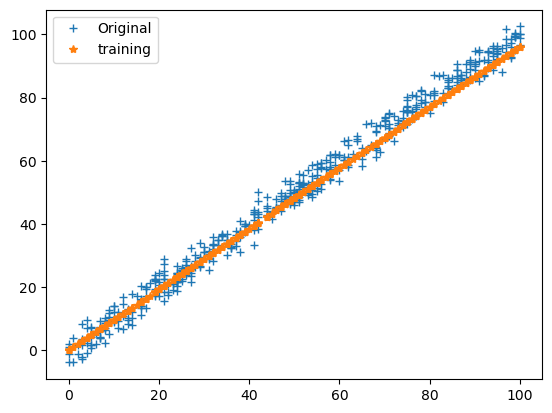

Iteration = 9 , Loss = 4.863563088841189


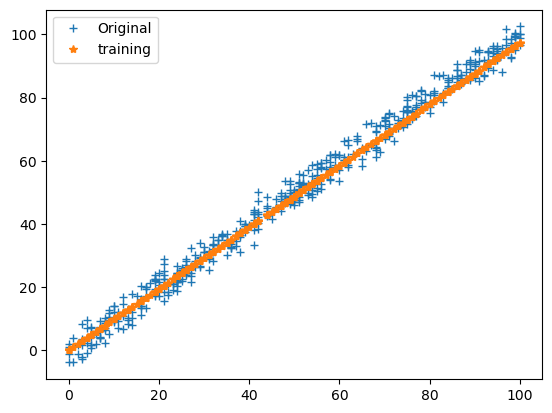

Iteration = 10 , Loss = 4.34895463608837


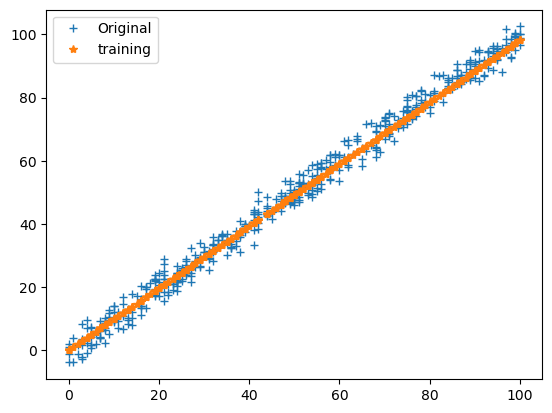

Iteration = 11 , Loss = 4.115475902527677


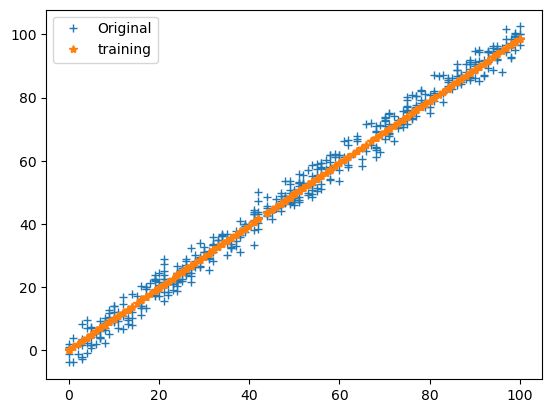

Iteration = 12 , Loss = 4.009546033970855


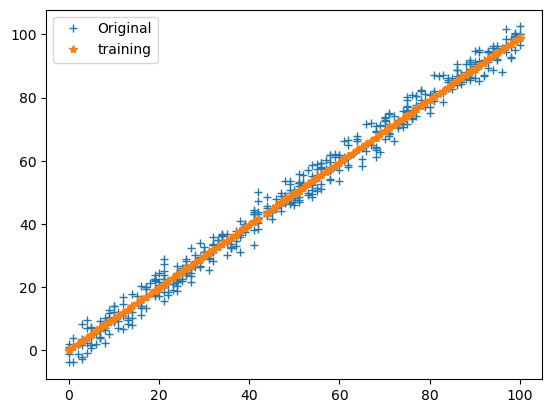

Iteration = 13 , Loss = 3.9614852267602063


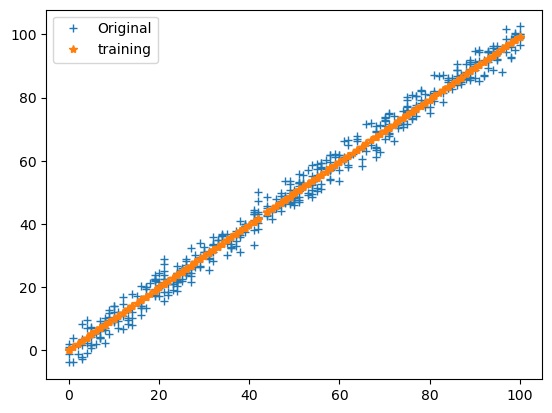

Iteration = 14 , Loss = 3.9396796767960196


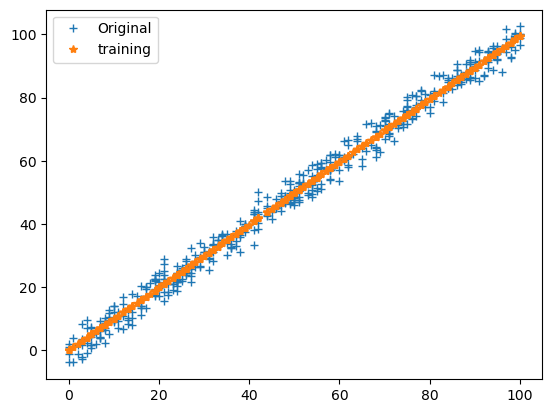

Iteration = 15 , Loss = 3.9297861661414943


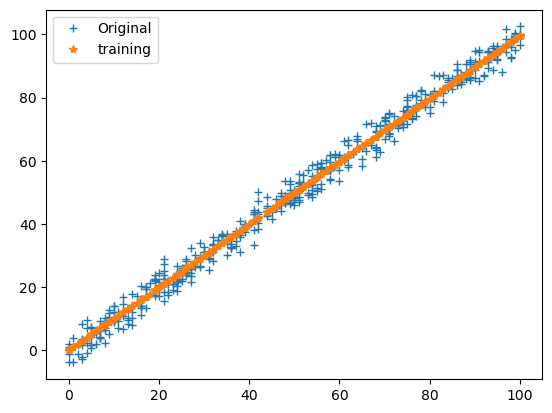

Iteration = 16 , Loss = 3.9252971609315708


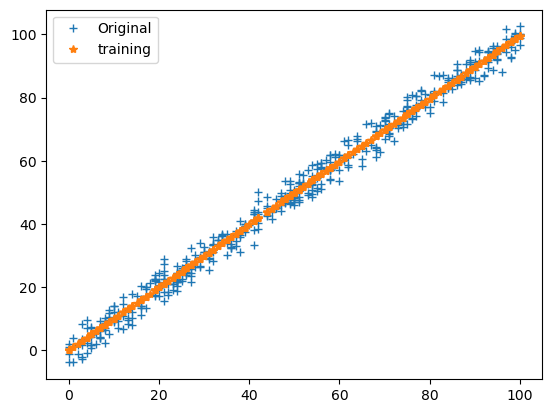

Iteration = 17 , Loss = 3.9232601858436515


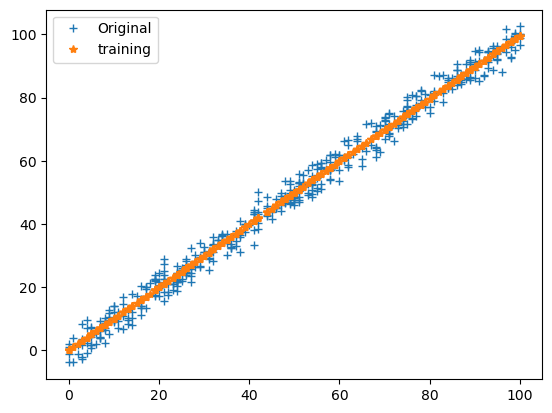

Iteration = 18 , Loss = 3.9223356995535954


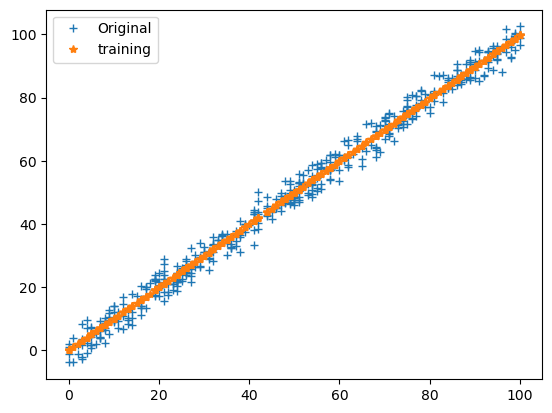

Iteration = 19 , Loss = 3.921915950678904


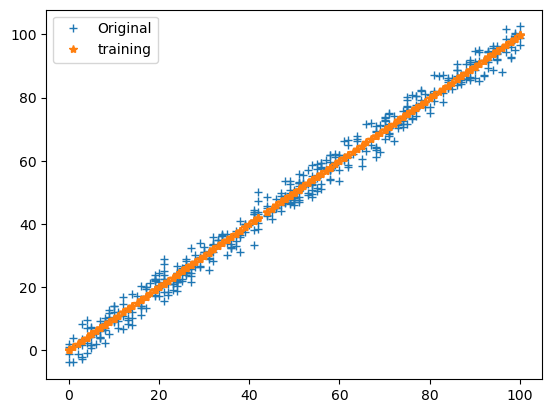

Iteration = 20 , Loss = 3.921725201744168


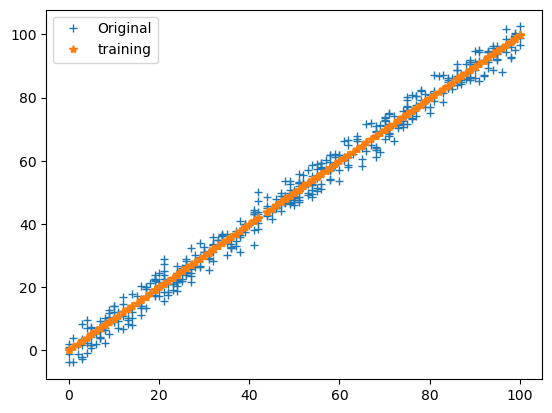

In [99]:
#the training rate should be low to balance the prediction else the orediction line will jump
#much more distance which will ruin our model "to test try to make trainig rate from 0.000q to 0.001

parameters , loss = train(train_input , train_output, 0.0001 , 20)

In [100]:
print(parameters)

{'m': 0.9962735914482234, 'c': 0.062232469410794806}


<b><font color = "green">Model Predictions</font></B>

In [108]:
loss

[528.5929915930191,
 241.96557892165526,
 111.92240400365255,
 52.92167119352053,
 26.15297305728179,
 14.007984754134066,
 8.497789800098966,
 5.9978079375423565,
 4.863563088841189,
 4.34895463608837,
 4.115475902527677,
 4.009546033970855,
 3.9614852267602063,
 3.9396796767960196,
 3.9297861661414943,
 3.9252971609315708,
 3.9232601858436515,
 3.9223356995535954,
 3.921915950678904,
 3.921725201744168]

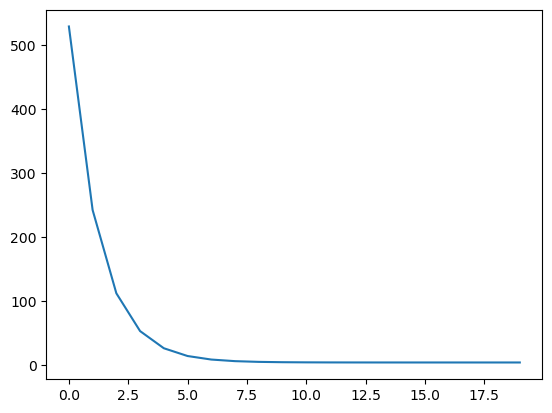

In [109]:
plt.plot(loss)

In [110]:
test_predictions = test_input * parameters['m'] + parameters['c']
#basically our model will product for our test input and then we will compare it with our
#test_output value and will check out the accruacy

#here test_predictions means our predicte "y" after training the model for our test_input
#and then we will compare it with our test_output
#here we will get best fit because our value of parameters "m" and "c" is optimized

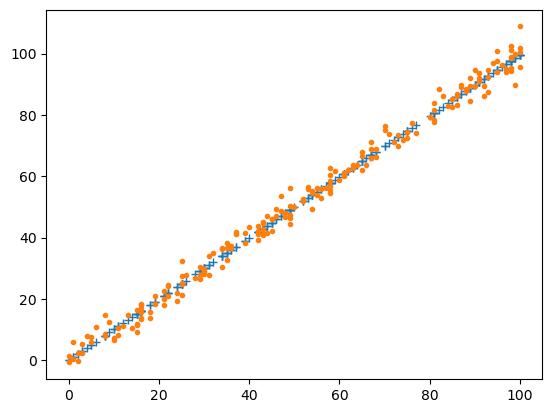

In [114]:
plt.plot(test_input, test_predictions,"+") #predicted answers
plt.plot(test_input, test_output,".") #original answers
plt.show()